(**Click the icon below to open this notebook in Colab**)

[![Open InColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/machine-learning-for-actuarial-science/blob/main/2025-spring/week12/notebook/demo.ipynb)

# Ensemble Learning

In [1]:
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np


X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
X.shape

(500, 2)

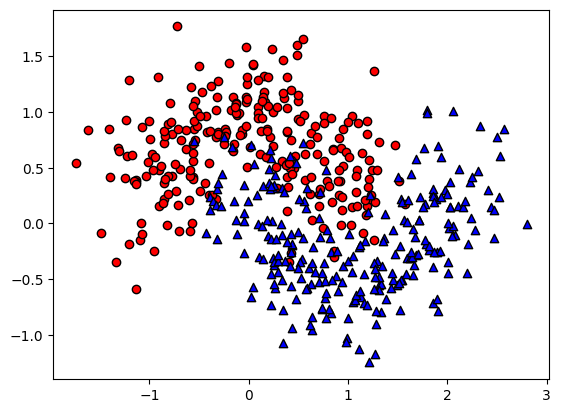

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[y==0,0],X[y==0,1],c='r',marker='o',edgecolors='black')
plt.scatter(X[y==1,0],X[y==1,1],c='b',marker='^',edgecolors='black')
plt.show()

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

## Boosting

**Boosting** (originally called hypothesis boosting) refers to any ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor.

### AdaBoost

$$
\begin{aligned}
&\text{Error Rate of Weak Classifier:} \quad
\epsilon_t = \sum_{i=1}^{N} w_i I(y_i \neq h_t(x_i)) \\

&\text{Weight of Weak Classifier:} \quad
\alpha_t = \frac{1}{2} \eta \ln \left(\frac{1 - \epsilon_t}{\epsilon_t} \right) \\

&\text{Final Prediction:} \quad
H(x) = \text{sign} \left\{ \sum_{t=1}^{T} \alpha_t h_t(x) \right\}
\end{aligned}
$$



1
0.5


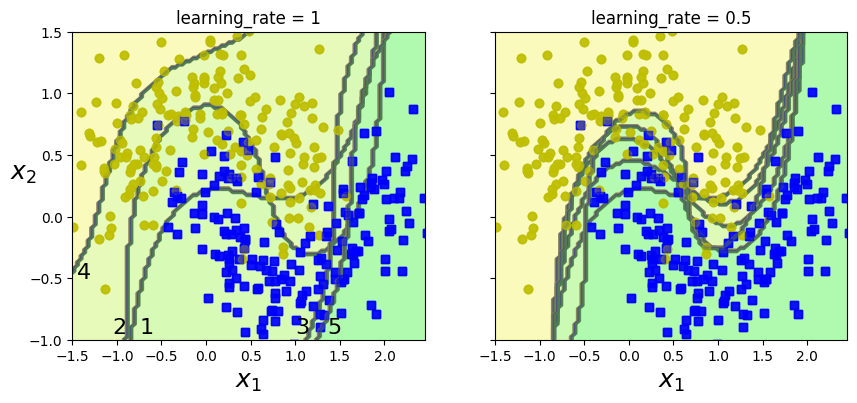

In [5]:
m = len(X_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    print(learning_rate)
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        error_weights = sample_weights[y_pred != y_train].sum()
        r = error_weights / sample_weights.sum()  # equation 7-1
        alpha = learning_rate * np.log((1 - r) / r)  # equation 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha)  # equation 7-3
        sample_weights /= sample_weights.sum()  # normalization step

        plot_decision_boundary(svm_clf, X_train, y_train, alpha=0.4)
        plt.title(f"learning_rate = {learning_rate}")
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=16)
        plt.text(-1.05, -0.95, "2", fontsize=16)
        plt.text(1.0, -0.95, "3", fontsize=16)
        plt.text(-1.45, -0.5, "4", fontsize=16)
        plt.text(1.36,  -0.95, "5", fontsize=16)
    else:
        plt.ylabel("")

plt.show()

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=1,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred_ada)

0.824

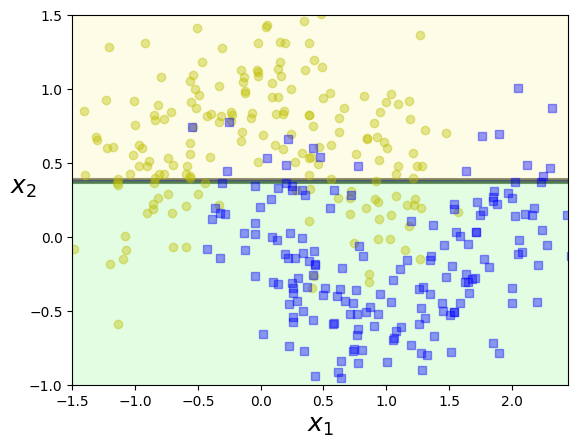

In [31]:
plot_decision_boundary(ada_clf, X_train, y_train, alpha=0.4)

### Gradient Boosting
Just like AdaBoost, gradient boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.

In case of a gradient boosting regressor, this yields predictions with the following form:
$$
\hat{y}_i = \sum_{k=1}^{n_{iter}} h_m(x_i)
$$

In [32]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)  # y = 3x² + Gaussian noise

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [33]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=43)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=43)

In [34]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=44)

In [35]:
X_new = np.array([[-0.4], [0.], [0.5]])
sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

In [36]:
import matplotlib.pyplot as plt

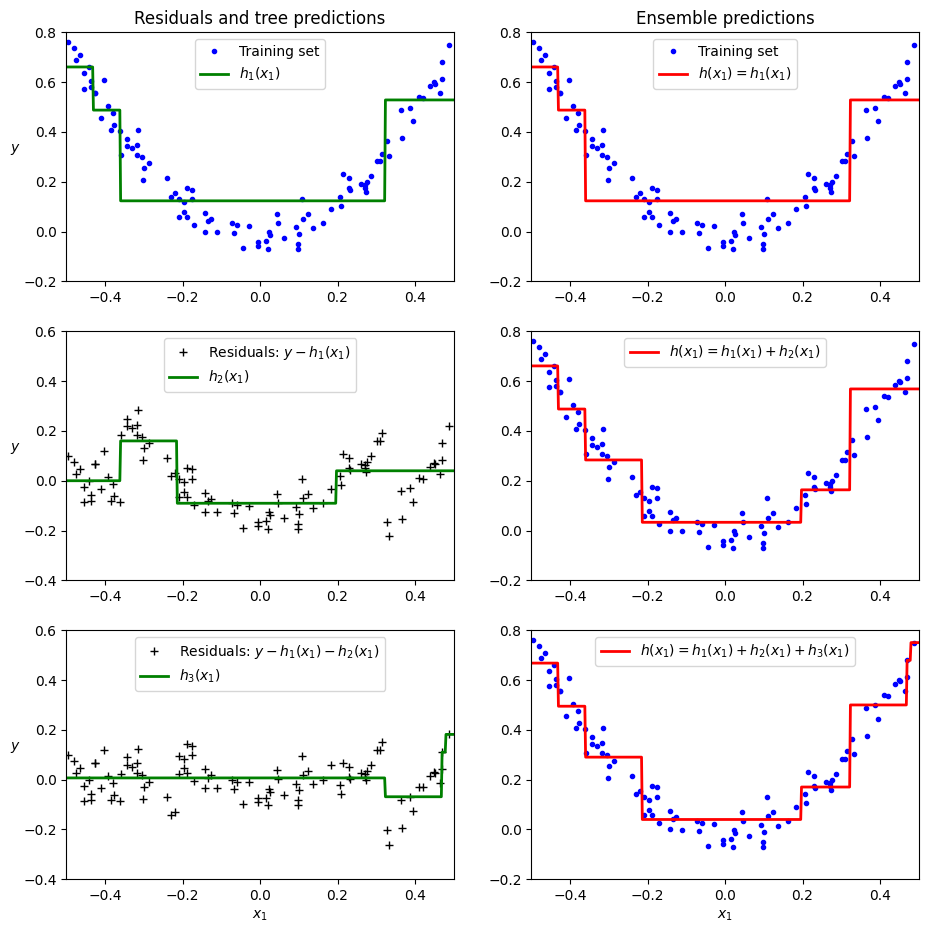

In [37]:
def plot_predictions(regressors, X, y, axes, style,
                     label=None, data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1))
                 for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center")
    plt.axis(axes)

plt.figure(figsize=(11, 11))

plt.subplot(3, 2, 1)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style="g-",
                 label="$h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$  ", rotation=0)
plt.title("Residuals and tree predictions")

plt.subplot(3, 2, 2)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style="r-",
                 label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.title("Ensemble predictions")

plt.subplot(3, 2, 3)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.4, 0.6], style="g-",
                 label="$h_2(x_1)$", data_style="k+",
                 data_label="Residuals: $y - h_1(x_1)$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 4)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.2, 0.8],
                  style="r-", label="$h(x_1) = h_1(x_1) + h_2(x_1)$")

plt.subplot(3, 2, 5)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.4, 0.6], style="g-",
                 label="$h_3(x_1)$", data_style="k+",
                 data_label="Residuals: $y - h_1(x_1) - h_2(x_1)$")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 6)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y,
                 axes=[-0.5, 0.5, -0.2, 0.8], style="r-",
                 label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$")
plt.show()

Directly apply a gradient boosting regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                 learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

In [ ]:
gbrt_best = GradientBoostingRegressor(
    max_depth=2, learning_rate=0.05, n_estimators=500,
    n_iter_no_change=10, random_state=42)
gbrt_best.fit(X, y)

In [ ]:
gbrt_best.n_estimators_

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-",
                 label="Ensemble predictions")
plt.title(f"learning_rate={gbrt.learning_rate}, "
          f"n_estimators={gbrt.n_estimators_}")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-")
plt.title(f"learning_rate={gbrt_best.learning_rate}, "
          f"n_estimators={gbrt_best.n_estimators_}")
plt.xlabel("$x_1$")
plt.show()

### `XgBoost`

#### Example 1

In [ ]:
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100) 

In [ ]:
from xgboost import XGBRegressor

xgb_reg_50 = XGBRegressor(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42)
xgb_reg_50.fit(X, y)

xgb_reg_10 = XGBRegressor(n_estimators=10, max_depth=3, learning_rate=0.1, random_state=42)
xgb_reg_10.fit(X, y)

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_predictions([xgb_reg_10], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-",
                 label="n_estimators=10")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.sca(axes[1])
plot_predictions([xgb_reg_50], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-",
                 label="n_estimators=50")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.show()

In [ ]:
xgb_reg_50 = XGBRegressor(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42)
xgb_reg_50.fit(X, y)

xgb_reg_50_v2 = XGBRegressor(n_estimators=50, max_depth=3, learning_rate=0.1, gamma=0.1, random_state=42)
xgb_reg_50_v2.fit(X, y)

xgb_reg_50_v3 = XGBRegressor(n_estimators=50, max_depth=3, learning_rate=0.1, gamma=0.01, random_state=42)
xgb_reg_50_v3.fit(X, y)

## visulize
fig, axes = plt.subplots(ncols=3, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_predictions([xgb_reg_50], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-",
                 label="n_estimators=50")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.sca(axes[1])
plot_predictions([xgb_reg_50_v2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-",
                 label="n_estimators=50, gamma=0.1")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.sca(axes[2])
plot_predictions([xgb_reg_50_v3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-",
                 label="n_estimators=50, gamma=0.01")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.legend(loc="upper center")
plt.tight_layout()
plt.show()

#### Example 2

In [ ]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names  # Get feature names

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost classifier
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Feature importance visualization
importances = model.feature_importances_
sorted_idx = np.argsort(importances)[-10:]
plt.figure(figsize=(10, 6))
plt.barh(range(10), importances[sorted_idx], align='center')
plt.yticks(range(10), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances")
plt.show()


### LightGBM
- https://lightgbm.readthedocs.io/en/stable/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier

In [ ]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names  # Get feature names

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a LightGBM classifier
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Feature importance visualization
importances = model.feature_importances_
sorted_idx = np.argsort(importances)[-10:]
plt.figure(figsize=(10, 6))
plt.barh(range(10), importances[sorted_idx], align='center')
plt.yticks(range(10), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances")
plt.show()


## Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5  # number of cross-validation folds
)
stacking_clf.fit(X_train, y_train)

In [ ]:
stacking_clf.score(X_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Get individual base estimators
base_models = stacking_clf.estimators_
names = [
    'LogisticRegression',
    'RandomForestRegressor',
    'SupportVectorClassifier'
]

# Evaluate each base model
for name, model in zip(names, base_models):
    y_pred = model.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, y_pred)  # Compute accuracy
    print(f"Accuracy of {name}: {acc:.4f}")

# Evaluate the final stacked model
stacked_acc = accuracy_score(y_test, stacking_clf.predict(X_test))
print(f"Accuracy of StackingClassifier (Final Model): {stacked_acc:.4f}")

# Model Serving

## `Pickle`
Serialize a model for later usage

### Example 1 - Save a Python object to local storage

In [ ]:
import pickle

data = {
    'name': 'John Doe',
    'age': 30,
    'city': 'New York',
    'occupation': 'Software Engineer'
}

# Save this dictionary to a file
with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)

print("Data saved to file data.pickle.")

In [ ]:
# Load the dictionary back from the pickle file
with open('data.pickle', 'rb') as f:
    data2 = pickle.load(f)
print("Dictionary loaded successfully!")

In [ ]:
data2

In [ ]:
data2 == data

In [ ]:
id(data2), id(data)

### Example 2 - Save a ML model

In [ ]:
import pickle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset loaded and split successfully!")

In [ ]:
# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")

In [ ]:
# Save the trained model to a file
with open("iris_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully as 'iris_model.pkl'!")

In [ ]:
# Predict with the in-memory model
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy
print("Accuracy:", accuracy)


In [ ]:
y_pred[:20]

In [ ]:
y_test[:20]

In [ ]:
# Predict with the saved model
with open('iris_model.pkl', 'rb') as f:
    model2 = pickle.load(f)

y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

In [ ]:
y_pred2[:20]

In [ ]:
y_test[:20]

In [ ]:
# Single data point (sepal length, sepal width, petal length, petal width)
single_data_point = [[5.1, 3.5, 1.4, 0.2]]

# Predict class for this single data point
single_prediction = model.predict(single_data_point)

# Get class name from iris dataset
predicted_class = iris.target_names[single_prediction[0]]

print(f"Predicted Class for the Single Data Point: {predicted_class}")


In [ ]:
# Predict class for this single data point
single_prediction2 = model.predict(single_data_point)

# Get class name from iris dataset
predicted_class2 = iris.target_names[single_prediction2[0]]

print(f"Predicted Class for the Single Data Point: {predicted_class2}")

In [ ]:
single_prediction

In [ ]:
iris.target_names

## `FastAPI`

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle
import numpy as np

app = FastAPI()

# Load trained model
with open("iris_model.pkl", "rb") as file:
    model = pickle.load(file)


# Define the expected request format
class FeaturesInput(BaseModel):
    features: list[float]


@app.post("/predict")
def predict(data: FeaturesInput):
    prediction = model.predict([data.features])
    return {"prediction": int(prediction[0])}


Run command `uvicorn fastapi_demo:app --host 0.0.0.0 --port 8000 --reload` to expose the API endpoints.
- Or run `fastapi dev fastapi_demo.py --reload`
Run `curl` command below to test the API
```
curl -X POST "http://127.0.0.1:8000/predict" \
      -H "Content-Type: application/json" \
      -d '{"features": [5.1, 3.5, 1.4, 0.2]}'
```

## `Streamlit` example

In [ ]:
import streamlit as st
import pickle
import numpy as np

# Load model
with open("iris_model.pkl", "rb") as file:
    model = pickle.load(file)

st.title("Iris Flower Classifier")

# User input
sepal_length = st.number_input("Sepal Length")
sepal_width = st.number_input("Sepal Width")
petal_length = st.number_input("Petal Length")
petal_width = st.number_input("Petal Width")

if st.button("Predict"):
    features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = model.predict(features)[0]
    st.write(f"Predicted Class: {prediction}")


Run `streamlit run streamlit_demo.py`